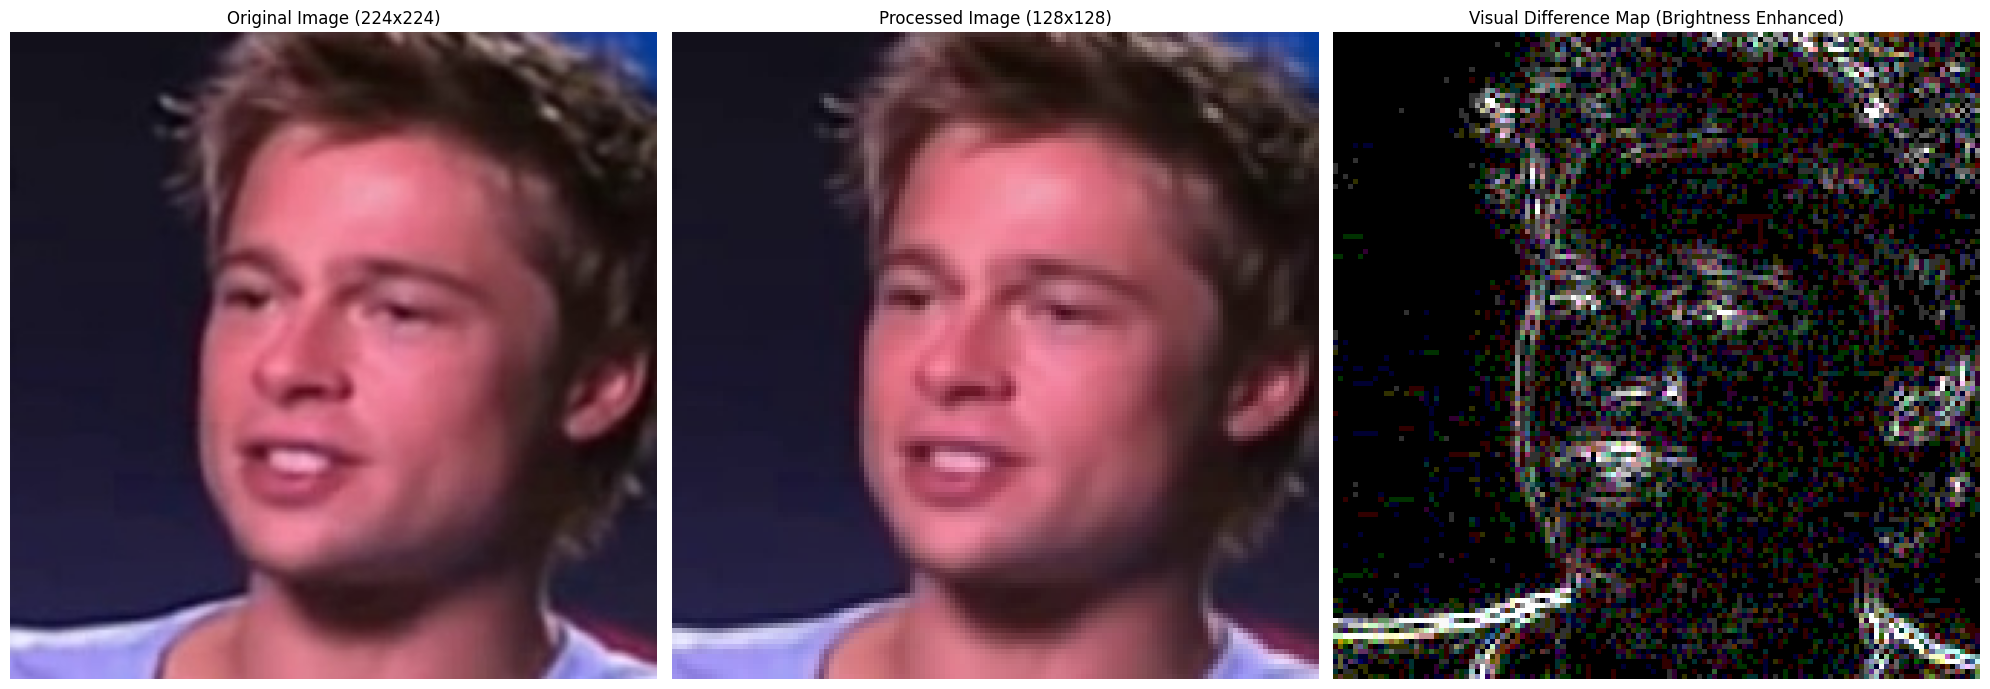

In [1]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import numpy as np

# Specify the image path
image_path = './Detected_face_images/Celeb-DF-v2_images/Celeb-real_images/id1_0003_4.jpg'

# Load the image
original_image = Image.open(image_path)

# Pre-processing steps
train_transforms = transforms.Compose([
    transforms.Resize([128, 128]),  # Resize the image
    transforms.ToTensor()          # Convert to tensor
])

# Apply pre-processing
transformed_image_tensor = train_transforms(original_image)  # In tensor format
transformed_image = transformed_image_tensor.permute(1, 2, 0).numpy()  # Convert back to HWC format for visualization

# Convert the processed image back to PIL
processed_image = Image.fromarray((transformed_image * 255).astype(np.uint8))

# Calculate the difference map
original_image_resized = original_image.resize((128, 128))  # Resize the original image to match the processed one
difference = np.abs(np.array(original_image_resized, dtype=np.float32) / 255 - transformed_image)
difference *= 50  # Increase brightness
difference_image = Image.fromarray((np.clip(difference, 0, 1) * 255).astype(np.uint8))

# Plot settings
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Original image (large size)
axes[0].imshow(original_image)
axes[0].set_title(f"Original Image ({original_image.size[0]}x{original_image.size[1]})")
axes[0].axis("off")

# Processed image (small size)
axes[1].imshow(processed_image)
axes[1].set_title("Processed Image (128x128)")
axes[1].axis("off")

# Visual difference map
axes[2].imshow(difference_image)
axes[2].set_title("Visual Difference Map (Brightness Enhanced)")
axes[2].axis("off")

plt.tight_layout()
plt.savefig('./preprocessed_data.png')
plt.show()


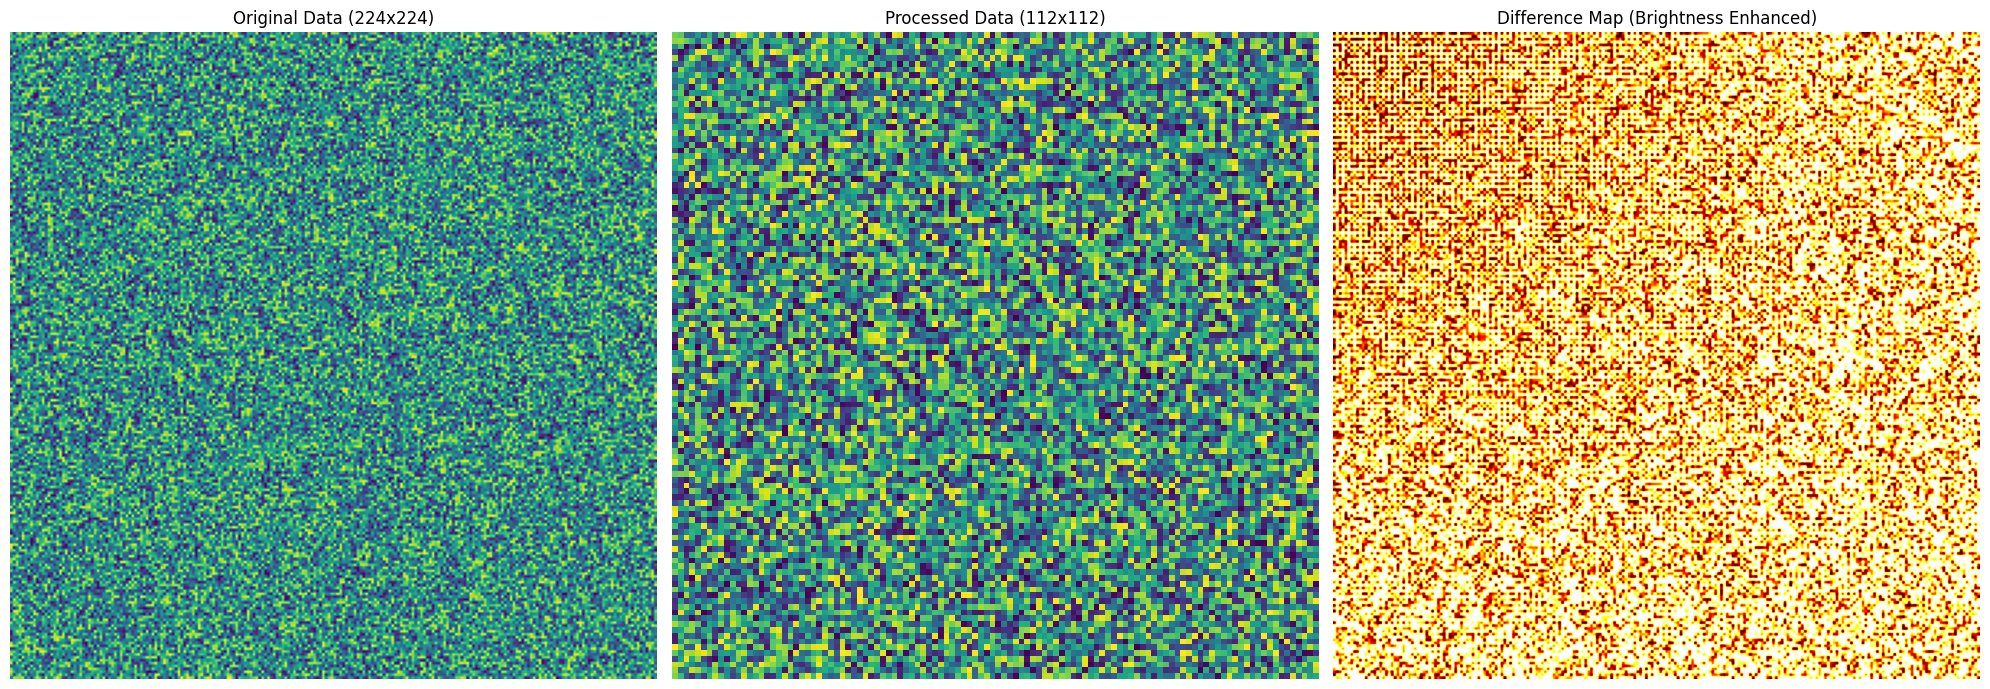

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom

# Generate synthetic data to simulate the process
original_data = np.random.rand(224, 224)  # Original large "image" as a random matrix
processed_data = original_data[::2, ::2]  # Downsample the "processed image" to 112x112
processed_data_resized = zoom(processed_data, (2, 2))  # Resize back to 224x224 for comparison

# Calculate the difference map
difference_data = np.abs(original_data - processed_data_resized)  # Simulated difference map
difference_data *= 5  # Brightness enhancement for visualization
difference_data = np.clip(difference_data, 0, 1)  # Ensure the values are between 0 and 1

# Plot settings
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Original data (large size)
axes[0].imshow(original_data, cmap='viridis')
axes[0].set_title("Original Data (224x224)")
axes[0].axis("off")

# Processed data (small size)
axes[1].imshow(processed_data, cmap='viridis')
axes[1].set_title("Processed Data (112x112)")
axes[1].axis("off")

# Difference data
axes[2].imshow(difference_data, cmap='hot')
axes[2].set_title("Difference Map (Brightness Enhanced)")
axes[2].axis("off")

plt.tight_layout()
plt.savefig('./synthetic_preprocessed_data_final.png')
plt.show()

